# **Importing Necessary Libraries**






In [610]:
#First, we need to import necessary libraries and the dataset.
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

#**Data Preprocessing & Cleaning**



In [611]:
# Load the dataset, trying different encodings
file_path = '/content/sales_data_sample.csv'
data = pd.read_csv(file_path, encoding='latin-1')

data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [612]:
data.reset_index(inplace=True)

In [613]:
#Shape Before Cleaning
data.shape

(2823, 26)

In [614]:
data.columns

Index(['index', 'ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH',
       'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID',
       'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME',
       'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [615]:
#Change column names to lowercase
data.columns= data.columns.str.lower()
data.columns

Index(['index', 'ordernumber', 'quantityordered', 'priceeach',
       'orderlinenumber', 'sales', 'orderdate', 'status', 'qtr_id', 'month_id',
       'year_id', 'productline', 'msrp', 'productcode', 'customername',
       'phone', 'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')

In [616]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             2823 non-null   int64  
 1   ordernumber       2823 non-null   int64  
 2   quantityordered   2823 non-null   int64  
 3   priceeach         2823 non-null   float64
 4   orderlinenumber   2823 non-null   int64  
 5   sales             2823 non-null   float64
 6   orderdate         2823 non-null   object 
 7   status            2823 non-null   object 
 8   qtr_id            2823 non-null   int64  
 9   month_id          2823 non-null   int64  
 10  year_id           2823 non-null   int64  
 11  productline       2823 non-null   object 
 12  msrp              2823 non-null   int64  
 13  productcode       2823 non-null   object 
 14  customername      2823 non-null   object 
 15  phone             2823 non-null   object 
 16  addressline1      2823 non-null   object 


In [617]:
# Convert date columns to datetime
data['orderdate'] = pd.to_datetime(data['orderdate'], errors='coerce')

In [618]:
#Check Duplication
data.duplicated().sum()
print('There are ', data.duplicated().sum(), ' rows duplicate')

There are  0  rows duplicate


In [619]:
# Check for missing values
isnull=pd.DataFrame(data.isnull().sum())
isnull.style.background_gradient(cmap='Reds')

,0
index,0
ordernumber,0
quantityordered,0
priceeach,0
orderlinenumber,0
sales,0
orderdate,0
status,0
qtr_id,0
month_id,0


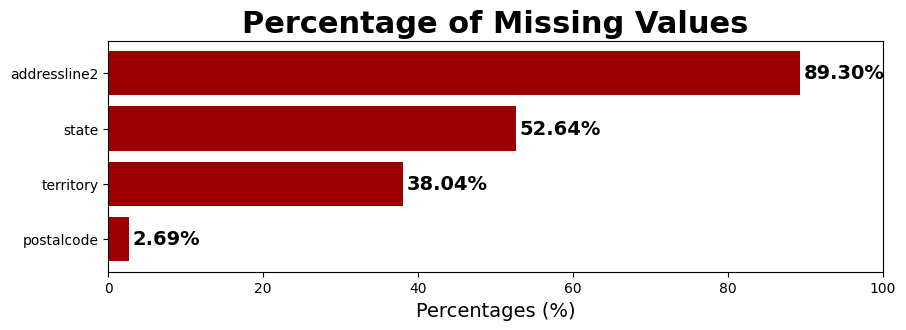

In [620]:
# Handling Missing Values

# Calculating the percentage of missing values for each column
missing_data = data.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / data.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(10, 3))
ax.barh(missing_percentage.index, missing_percentage, color='#9D0000')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=14, color='black')

# Set x-axis limit
ax.set_xlim([0, 100])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=14)
plt.show()

In [621]:
#Concatenating to two address columns with one cloumn having null values
data['address'] = data['addressline1'].fillna(' ') + "  " + data['addressline2'].fillna('')
data.drop(['addressline1','addressline2'], axis=1, inplace=True)
data.head()

,index,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,...,phone,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize,address
0,0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,...,2125557818,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,897 Long Airport Avenue
1,1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,...,26.47.1555,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,59 rue de l'Abbaye
2,2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,...,+33 1 46 62 7555,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,27 rue du Colonel Pierre Avia
3,3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,...,6265557265,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,78934 Hillside Dr.
4,4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,...,6505551386,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,7734 Strong St.


In [622]:
''' There is null values in postalcode coulmn
    The postalcode is part of an address that shows exactly where a place is
    so after handling adress, I will drop the postalcode Column'''

data = data.drop('postalcode',axis=1)
data.head()

,index,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,...,customername,phone,city,state,country,territory,contactlastname,contactfirstname,dealsize,address
0,0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,...,Land of Toys Inc.,2125557818,NYC,NY,USA,NaN,Yu,Kwai,Small,897 Long Airport Avenue
1,1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,...,Reims Collectables,26.47.1555,Reims,NaN,France,EMEA,Henriot,Paul,Small,59 rue de l'Abbaye
2,2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,...,Lyon Souveniers,+33 1 46 62 7555,Paris,NaN,France,EMEA,Da Cunha,Daniel,Medium,27 rue du Colonel Pierre Avia
3,3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,...,Toys4GrownUps.com,6265557265,Pasadena,CA,USA,NaN,Young,Julie,Medium,78934 Hillside Dr.
4,4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,...,Corporate Gift Ideas Co.,6505551386,San Francisco,CA,USA,NaN,Brown,Julie,Medium,7734 Strong St.


In [623]:
#Identify Countries where the 'territory' column is NaN
nan_territory_df = data[data['territory'].isna()]
countries_with_nan_territory = nan_territory_df['country'].unique()
print(countries_with_nan_territory)

['USA' 'Canada']


In [624]:
'''The USA and Canada are the two countries where the territory column had Null Values.
   Fill it up become easier as they both belong to the same Territory "AMER"-> North, Central, and South Americ'''

data['territory'] = data['territory'].fillna("AMER")
data.head()

,index,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,...,customername,phone,city,state,country,territory,contactlastname,contactfirstname,dealsize,address
0,0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,...,Land of Toys Inc.,2125557818,NYC,NY,USA,AMER,Yu,Kwai,Small,897 Long Airport Avenue
1,1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,...,Reims Collectables,26.47.1555,Reims,NaN,France,EMEA,Henriot,Paul,Small,59 rue de l'Abbaye
2,2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,...,Lyon Souveniers,+33 1 46 62 7555,Paris,NaN,France,EMEA,Da Cunha,Daniel,Medium,27 rue du Colonel Pierre Avia
3,3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,...,Toys4GrownUps.com,6265557265,Pasadena,CA,USA,AMER,Young,Julie,Medium,78934 Hillside Dr.
4,4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,...,Corporate Gift Ideas Co.,6505551386,San Francisco,CA,USA,AMER,Brown,Julie,Medium,7734 Strong St.


In [625]:
''' I discovered that territory have japan that contain ['Singapore','Philippines','japan']
    This country belong to APAC ! '''

apac_countries = ['Singapore', 'Philippines', 'Japan']
data.loc[data['country'].isin(apac_countries), 'territory'] = 'APAC'

In [626]:
'''There is a mismatch between priceeach * quantityordered and sales indicates a potential inconsistency .'''

# Calculate the expected sales
data['expected_sales'] = data['priceeach'] * data['quantityordered']

# Find rows where expected sales don't match actual sales
mismatched_sales = data[data['expected_sales'] != data['sales']]

# Calculate total number of rows
total_rows = len(data)

# Calculate percentage of mismatched rows
percentage_mismatched = (len(mismatched_sales) / total_rows) * 100

# Print the percentage of mismatched rows
print(f"Percentage of Mismatched Rows: \033[1m{percentage_mismatched:.2f}%\033[0m")

Percentage of Mismatched Rows: 60.11%


In [627]:
# Update 'sales' column with the values from 'expected_sales'
data['sales'] = data['expected_sales']

# Check for matches
all_matches = (data['sales'] == data['expected_sales']).all()

# Print the match status
if all_matches:
    print("All sales values now match the expected sales values.")
else:
    print("There might be some mismatched sales values. You can examine 'data'")

# Drop the 'expected_sales' column
data.drop('expected_sales', axis=1, inplace=True)

# Print a message
print("Sales column updated with expected sales values. 'expected_sales' column dropped.")


All sales values now match the expected sales values.
Sales column updated with expected sales values. 'expected_sales' column dropped.


In [628]:
data.head()

,index,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,...,customername,phone,city,state,country,territory,contactlastname,contactfirstname,dealsize,address
0,0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,...,Land of Toys Inc.,2125557818,NYC,NY,USA,AMER,Yu,Kwai,Small,897 Long Airport Avenue
1,1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,...,Reims Collectables,26.47.1555,Reims,NaN,France,EMEA,Henriot,Paul,Small,59 rue de l'Abbaye
2,2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,...,Lyon Souveniers,+33 1 46 62 7555,Paris,NaN,France,EMEA,Da Cunha,Daniel,Medium,27 rue du Colonel Pierre Avia
3,3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,...,Toys4GrownUps.com,6265557265,Pasadena,CA,USA,AMER,Young,Julie,Medium,78934 Hillside Dr.
4,4,10159,49,100.00,14,4900.00,2003-10-10,Shipped,4,10,...,Corporate Gift Ideas Co.,6505551386,San Francisco,CA,USA,AMER,Brown,Julie,Medium,7734 Strong St.


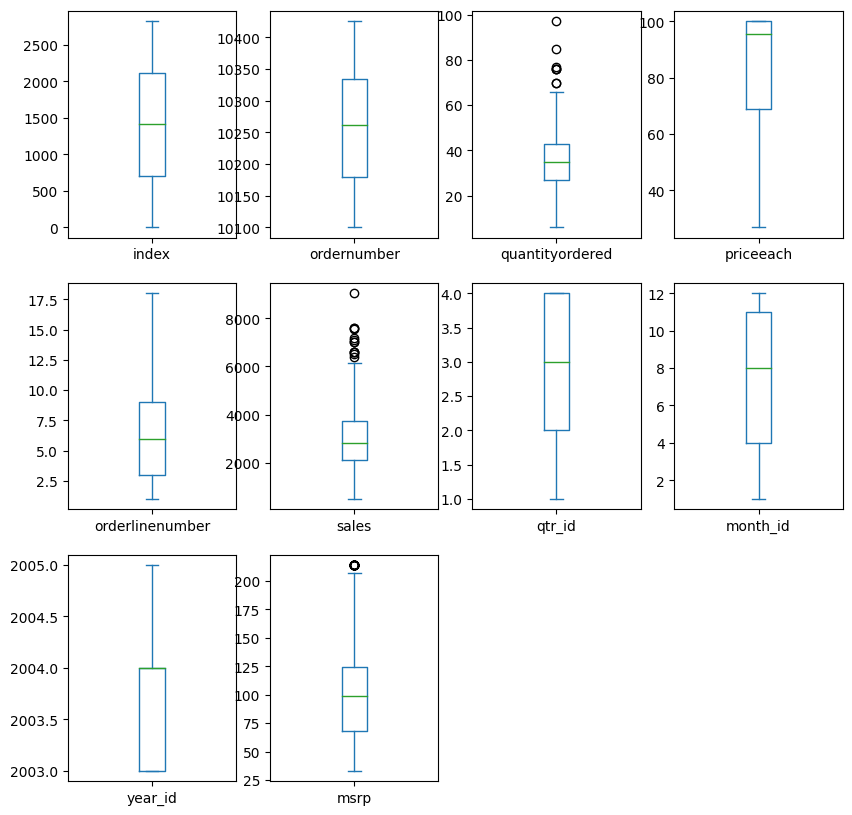

In [629]:
# Outlier detection

'''As we can see here 'msrp' has only one outlier, 'sales' have many outlier, and 'quantityordered' has also some outlier.'''

data.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(10,10), layout=(3,4))
plt.show()

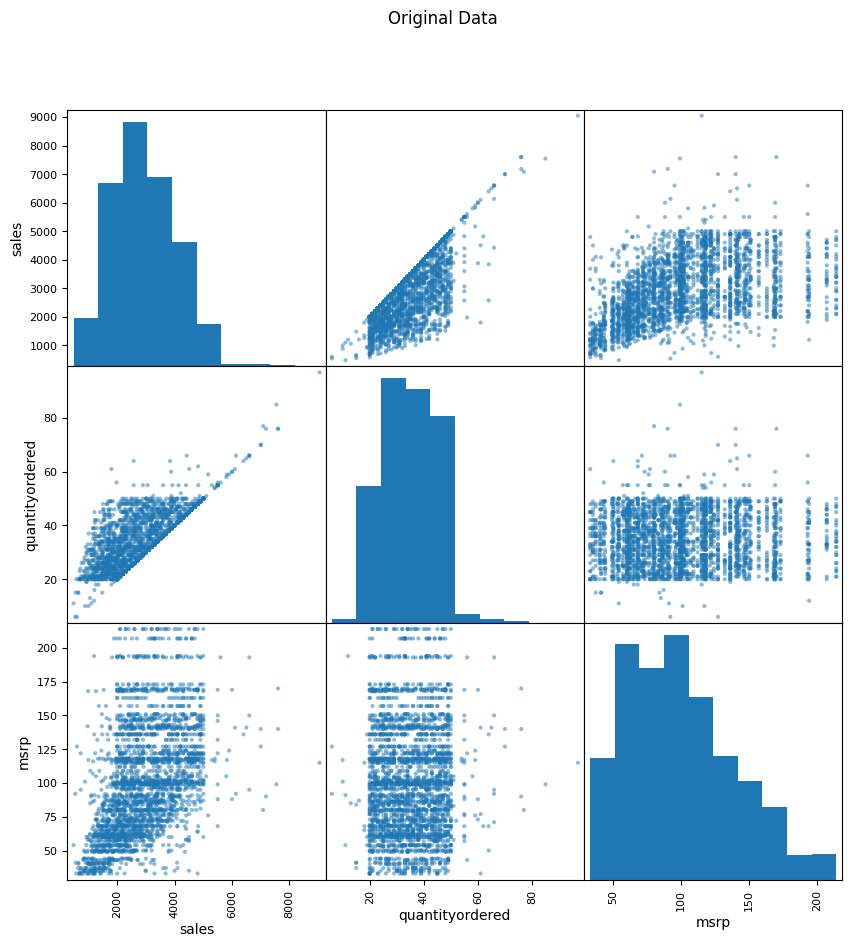

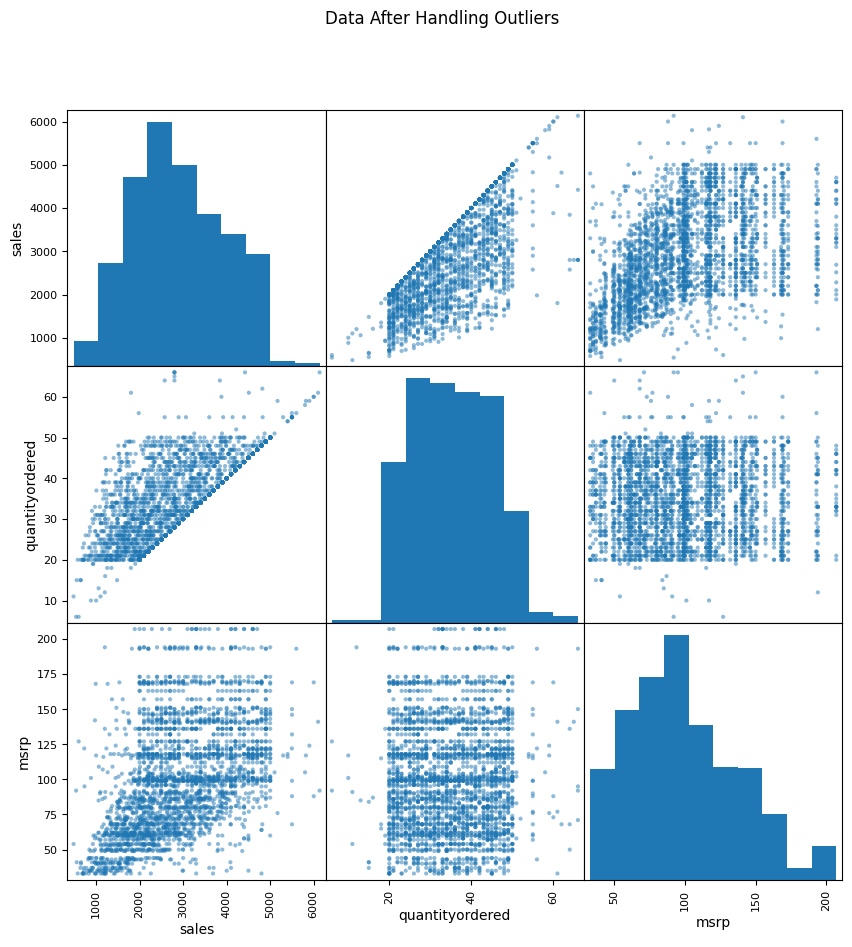

In [630]:
'''Filtering outlier'''

Outliers_data = data[['sales', 'quantityordered', 'msrp']]

# Create a copy of the original data for comparison
original_data = data.copy()

# Calculate the median for each column and store it in a dictionary
median_values = Outliers_data.median().to_dict()

# Replace outlier values with median values for each column
for col in Outliers_data.columns:
    Q1 = Outliers_data[col].quantile(0.25)
    Q3 = Outliers_data[col].quantile(0.75)
    IQR = Q3 - Q1
    Outliers_data[col] = Outliers_data[col].apply(
        lambda x: median_values[col] if (x > Q3 + 1.5 * IQR) or (x < Q1 - 1.5 * IQR) else x
    )

# Update the relevant columns in the original `data` DataFrame
data[['sales', 'quantityordered', 'msrp']] = Outliers_data

# Plot scatter matrix for the original data
pd.plotting.scatter_matrix(original_data[['sales', 'quantityordered', 'msrp']], figsize=(10, 10))
plt.suptitle('Original Data')
plt.show()

# Plot scatter matrix for the data after handling outliers
pd.plotting.scatter_matrix(data[['sales', 'quantityordered', 'msrp']], figsize=(10, 10))
plt.suptitle('Data After Handling Outliers')
plt.show()


In [631]:
#Identify Countries where the 'State' column is NaN
nan_state = data[data["state"].isna()]
countries_with_nan_state = nan_state['country'].unique()
print(countries_with_nan_state)

['France' 'Norway' 'Finland' 'Austria' 'UK' 'Spain' 'Sweden' 'Singapore'
 'Italy' 'Denmark' 'Belgium' 'Philippines' 'Germany' 'Switzerland'
 'Ireland']


In [632]:
'''There are many countries with Null Value State Column and accurately predicting
   which exact State in the Country will be almost impossible.
   So I will look at the descriptive statistics and drop the State Column'''

state_sales = data.groupby('state')['sales'].describe()
print(state_sales)


               count         mean          std      min        25%       50%  \
state                                                                          
BC              48.0  2751.880000   835.320092  1119.93  2089.8150  2571.410   
CA             416.0  2962.041130  1123.013979   541.14  2122.9200  2835.175   
CT              61.0  3116.652787  1047.791917   875.91  2213.3800  3146.500   
Isle of Wight   26.0  2814.235769  1023.394922  1192.56  2174.6050  2600.000   
MA             190.0  2953.339421  1062.352524   651.80  2186.4550  2800.000   
NH              34.0  2983.191176  1025.055840   917.70  2268.4400  2775.770   
NJ              21.0  3169.508095  1112.053148  1100.00  2389.6000  2800.000   
NSW             92.0  2766.128152  1034.694269   652.35  2126.5325  2635.975   
NV              29.0  2511.346552   945.859659   995.50  1713.8000  2348.750   
NY             178.0  2944.208483  1028.949302   905.28  2100.0000  2900.000   
Osaka           20.0  2781.032500   756.

In [633]:
#After looking through the State Descriptive Statistics, I will drop the State Column
data = data.drop('state',axis=1)
data.head()

,index,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,...,productcode,customername,phone,city,country,territory,contactlastname,contactfirstname,dealsize,address
0,0,10107,30.0,95.70,2,2871.00,2003-02-24,Shipped,1,2,...,S10_1678,Land of Toys Inc.,2125557818,NYC,USA,AMER,Yu,Kwai,Small,897 Long Airport Avenue
1,1,10121,34.0,81.35,5,2765.90,2003-05-07,Shipped,2,5,...,S10_1678,Reims Collectables,26.47.1555,Reims,France,EMEA,Henriot,Paul,Small,59 rue de l'Abbaye
2,2,10134,41.0,94.74,2,3884.34,2003-07-01,Shipped,3,7,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,Paris,France,EMEA,Da Cunha,Daniel,Medium,27 rue du Colonel Pierre Avia
3,3,10145,45.0,83.26,6,3746.70,2003-08-25,Shipped,3,8,...,S10_1678,Toys4GrownUps.com,6265557265,Pasadena,USA,AMER,Young,Julie,Medium,78934 Hillside Dr.
4,4,10159,49.0,100.00,14,4900.00,2003-10-10,Shipped,4,10,...,S10_1678,Corporate Gift Ideas Co.,6505551386,San Francisco,USA,AMER,Brown,Julie,Medium,7734 Strong St.


In [634]:
# We don't have any null values now :)
data.isnull().sum()

index               0
ordernumber         0
quantityordered     0
priceeach           0
orderlinenumber     0
sales               0
orderdate           0
status              0
qtr_id              0
month_id            0
year_id             0
productline         0
msrp                0
productcode         0
customername        0
phone               0
city                0
country             0
territory           0
contactlastname     0
contactfirstname    0
dealsize            0
address             0
dtype: int64

In [635]:
#combine similar coulmn into one coulmn for consistency.
data['contactname'] = data['contactfirstname'] +" "+ data['contactlastname']
data = data.drop('contactfirstname',axis=1)
data = data.drop('contactlastname',axis=1)
data.head()

,index,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,...,msrp,productcode,customername,phone,city,country,territory,dealsize,address,contactname
0,0,10107,30.0,95.70,2,2871.00,2003-02-24,Shipped,1,2,...,95.0,S10_1678,Land of Toys Inc.,2125557818,NYC,USA,AMER,Small,897 Long Airport Avenue,Kwai Yu
1,1,10121,34.0,81.35,5,2765.90,2003-05-07,Shipped,2,5,...,95.0,S10_1678,Reims Collectables,26.47.1555,Reims,France,EMEA,Small,59 rue de l'Abbaye,Paul Henriot
2,2,10134,41.0,94.74,2,3884.34,2003-07-01,Shipped,3,7,...,95.0,S10_1678,Lyon Souveniers,+33 1 46 62 7555,Paris,France,EMEA,Medium,27 rue du Colonel Pierre Avia,Daniel Da Cunha
3,3,10145,45.0,83.26,6,3746.70,2003-08-25,Shipped,3,8,...,95.0,S10_1678,Toys4GrownUps.com,6265557265,Pasadena,USA,AMER,Medium,78934 Hillside Dr.,Julie Young
4,4,10159,49.0,100.00,14,4900.00,2003-10-10,Shipped,4,10,...,95.0,S10_1678,Corporate Gift Ideas Co.,6505551386,San Francisco,USA,AMER,Medium,7734 Strong St.,Julie Brown


In [636]:
# Shape After Cleaning
data.shape

(2823, 22)

#**Data Analysis & Visualization**

> **Customer Segmententation**

> **Customer LifeTime Value (CLTV)**



In [637]:
# Step 1: Calculate total spending per customer
customer_spending = data.groupby('customername')['sales'].sum()

# Step 2: Calculate purchase frequency per customer
purchase_frequency = data.groupby('customername')['ordernumber'].count()

# Step 3: Create customer segments DataFrame
segments = pd.DataFrame({
    'Total Spending': customer_spending,
    'Purchase Frequency': purchase_frequency
})

# Step 4: Define high-value and low-value customers based on quantiles
high_value_threshold = segments['Total Spending'].quantile(0.75)
low_value_threshold = segments['Total Spending'].quantile(0.25)

# Initialize all customers as "Low Value"
segments['Customer Value'] = 'Low Value'
# Update customers who are above the high value threshold to "High Value"
segments.loc[segments['Total Spending'] > high_value_threshold, 'Customer Value'] = 'High Value'

# Step 5: Merge the segments DataFrame back into the original DataFrame
data = data.merge(segments[['Customer Value']], left_on='customername', right_index=True, how='left')

# Now the `data` DataFrame has a new column `Customer Value` labeling each customer as "High Value" or "Low Value"

print(data.head())


   index  ordernumber  quantityordered  priceeach  orderlinenumber    sales  \
0      0        10107             30.0      95.70                2  2871.00   
1      1        10121             34.0      81.35                5  2765.90   
2      2        10134             41.0      94.74                2  3884.34   
3      3        10145             45.0      83.26                6  3746.70   
4      4        10159             49.0     100.00               14  4900.00   

   orderdate   status  qtr_id  month_id  ...  productcode  \
0 2003-02-24  Shipped       1         2  ...     S10_1678   
1 2003-05-07  Shipped       2         5  ...     S10_1678   
2 2003-07-01  Shipped       3         7  ...     S10_1678   
3 2003-08-25  Shipped       3         8  ...     S10_1678   
4 2003-10-10  Shipped       4        10  ...     S10_1678   

               customername             phone           city country  \
0         Land of Toys Inc.        2125557818            NYC     USA   
1        Reims

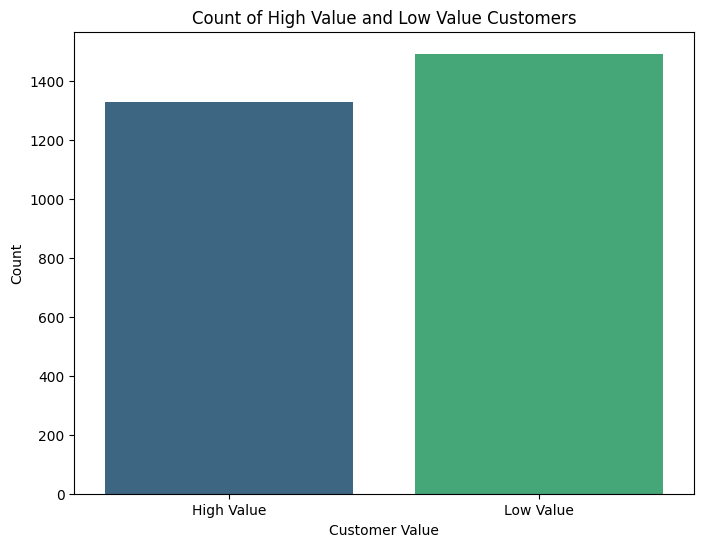

In [638]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Customer Value', palette='viridis')
plt.title('Count of High Value and Low Value Customers')
plt.xlabel('Customer Value')
plt.ylabel('Count')
plt.show()

In [639]:
# Step 1: Calculate Average Purchase Value (APV)
segments['APV'] = segments['Total Spending'] / segments['Purchase Frequency']

# Step 2: Calculate Average Purchase Frequency Rate (APFR)
average_customer_lifespan = 3

# Step 3: Calculate Customer Value (CV)
segments['Customer Value'] = segments['APV'] * segments['Purchase Frequency']

# Step 4: Calculate Customer Lifetime Value (CLTV)
segments['CLTV'] = segments['Customer Value'] * average_customer_lifespan

# Step 5: Display the segments DataFrame with CLTV
print(segments)

# Step 6: Merge the CLTV back into the original data
data = data.merge(segments[['CLTV']], left_on='customername', right_index=True, how='left')

# Print the updated original data with CLTV
print(data.head())

                             Total Spending  Purchase Frequency  \
customername                                                      
AV Stores, Co.                    136873.25                  51   
Alpha Cognac                       58885.28                  20   
Amica Models & Co.                 72645.01                  26   
Anna's Decorations, Ltd           121260.41                  46   
Atelier graphique                  21213.16                   7   
...                                     ...                 ...   
Vida Sport, Ltd                    93344.91                  31   
Vitachrome Inc.                    67511.37                  25   
Volvo Model Replicas, Co           58374.21                  19   
West Coast Collectables Co.        41506.23                  13   
giftsbymail.co.uk                  73170.13                  26   

                             Customer Value          APV       CLTV  
customername                                              

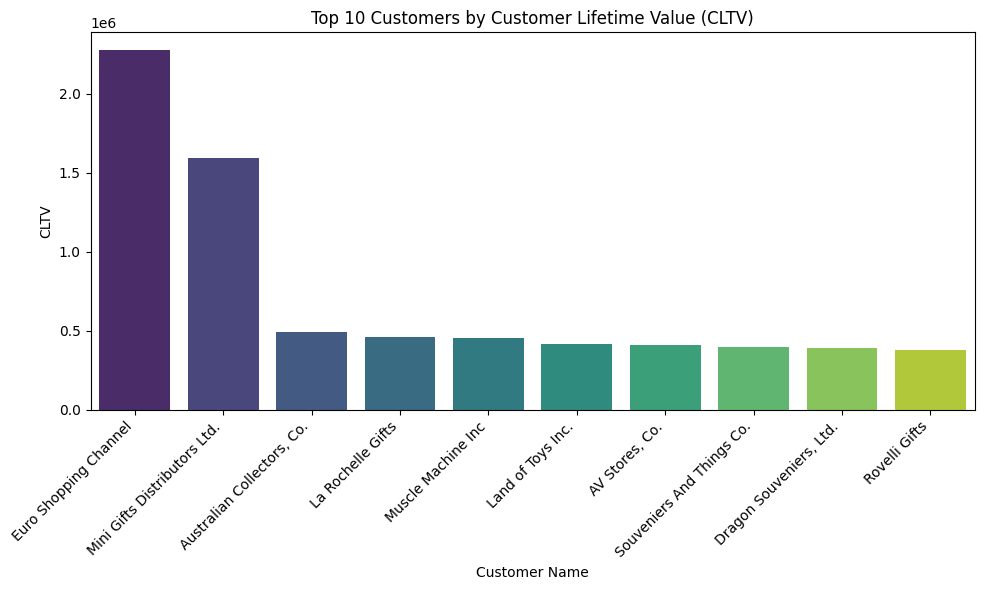

In [640]:
# Bar Plot: Top 10 Customers by CLTV
top_customers = segments.nlargest(10, 'CLTV')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x=top_customers.index, y='CLTV', palette='viridis')
plt.title('Top 10 Customers by Customer Lifetime Value (CLTV)')
plt.xlabel('Customer Name')
plt.ylabel('CLTV')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

> **RFM Analysis**


In [641]:
# Step 1: Calculating Recency - days since last order
current_date = data['orderdate'].max() + pd.Timedelta(days=7)
data['Recency'] = (current_date - data.groupby('customername')['orderdate'].transform('max')).dt.days

# Step 2: Calculating Frequency - number of orders per customer
data['Frequency'] = data.groupby('customername')['ordernumber'].transform('nunique')

# Step 3: Calculating Monetary - total sales per customer
data['Monetary'] = data.groupby('customername')['sales'].transform('sum')

# Step 4: Creating a new dataframe for RFM analysis
rfm_df = data[['customername', 'Recency', 'Frequency', 'Monetary']].drop_duplicates()

rfm_df


,customername,Recency,Frequency,Monetary
0,Land of Toys Inc.,204,4,138798.17
1,Reims Collectables,69,5,116502.73
2,Lyon Souveniers,82,3,59136.70
3,Toys4GrownUps.com,146,3,86224.95
4,Corporate Gift Ideas Co.,104,4,118844.95
...,...,...,...,...
483,"Australian Collectables, Ltd",29,3,56139.62
554,Gift Ideas Corp.,185,3,52681.08
567,"Bavarian Collectables Imports, Co.",265,1,32701.58
571,Royale Belge,148,4,25960.70


In [642]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,92.0,188.826087,131.420524,7.00,87.250,192.00,236.25,515.00
Frequency,92.0,3.336957,2.924986,1.00,2.000,3.00,3.00,26.00
Monetary,92.0,89505.748696,90714.818342,8642.15,56693.715,73788.74,96460.09,758195.05


In [643]:
rfm_df["recency_score"] = pd.qcut(rfm_df['Recency'], 5, labels= [5, 4, 3, 2, 1])

rfm_df["frequency_score"]= pd.qcut(rfm_df["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm_df["monetary_score"]= pd.qcut(rfm_df["Monetary"], 5, labels=[1,2,3,4,5])

rfm_df.sample(10)

,customername,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
115,"Men 'R' US Retailers, Ltd.",515,2,42093.78,1,1,1
131,The Sharp Gifts Warehouse,46,4,123601.04,5,5,5
44,Mini Gifts Distributors Ltd.,9,17,530587.19,5,5,5
20,Salzburg Collectables,21,4,122087.85,5,5,5
39,"Tokyo Collectables, Ltd",46,4,97456.04,5,5,4
109,Mini Creations Ltd.,151,3,95672.21,4,3,4
2,Lyon Souveniers,82,3,59136.70,4,2,2
483,"Australian Collectables, Ltd",29,3,56139.62,5,4,2
119,Petit Auto,8,3,68568.18,5,3,3
567,"Bavarian Collectables Imports, Co.",265,1,32701.58,1,1,1


In [644]:
rfm_df.head()

,customername,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,Land of Toys Inc.,204,4,138798.17,2,4,5
1,Reims Collectables,69,5,116502.73,4,5,5
2,Lyon Souveniers,82,3,59136.70,4,2,2
3,Toys4GrownUps.com,146,3,86224.95,4,2,4
4,Corporate Gift Ideas Co.,104,4,118844.95,4,4,5


In [645]:
rfm_df["RFM_SCORE"] = (rfm_df["recency_score"].astype(str) + rfm_df["frequency_score"].astype(str))
rfm_df.head()

,customername,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,Land of Toys Inc.,204,4,138798.17,2,4,5,24
1,Reims Collectables,69,5,116502.73,4,5,5,45
2,Lyon Souveniers,82,3,59136.70,4,2,2,42
3,Toys4GrownUps.com,146,3,86224.95,4,2,4,42
4,Corporate Gift Ideas Co.,104,4,118844.95,4,4,5,44


In [646]:
# Segmenting Customers Using RFM Score

seg_map = {

 r'[1-2][1-2]': 'hibernating',
 r'[1-2][3-4]': 'at_Risk',
 r'[1-2]5': 'cant_loose',
 r'3[1-2]': 'about_to_sleep',
 r'33': 'need_attention',
 r'[3-4][4-5]': 'loyal_customers',
 r'41': 'promising',
 r'51': 'new_customers',
 r'[4-5][2-3]': 'potential_loyalists',
 r'5[4-5]': 'champions'

}

rfm_df['segment'] = rfm_df['RFM_SCORE'].replace(seg_map, regex=True)
rfm_df.head()

,customername,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,Land of Toys Inc.,204,4,138798.17,2,4,5,24,at_Risk
1,Reims Collectables,69,5,116502.73,4,5,5,45,loyal_customers
2,Lyon Souveniers,82,3,59136.70,4,2,2,42,potential_loyalists
3,Toys4GrownUps.com,146,3,86224.95,4,2,4,42,potential_loyalists
4,Corporate Gift Ideas Co.,104,4,118844.95,4,4,5,44,loyal_customers


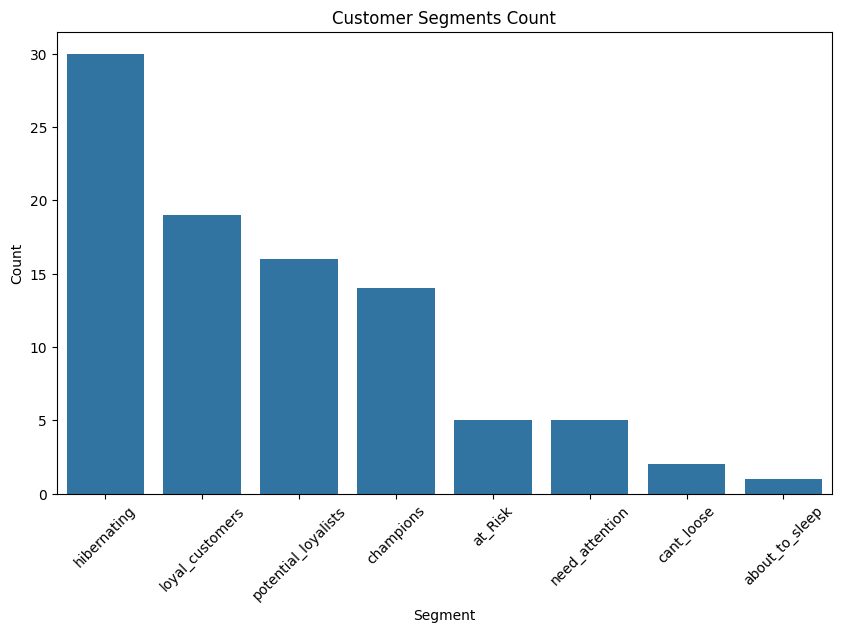

In [647]:
# Bar Chart for Customer Segments
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_df, x='segment', order=rfm_df['segment'].value_counts().index)
plt.title('Customer Segments Count')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

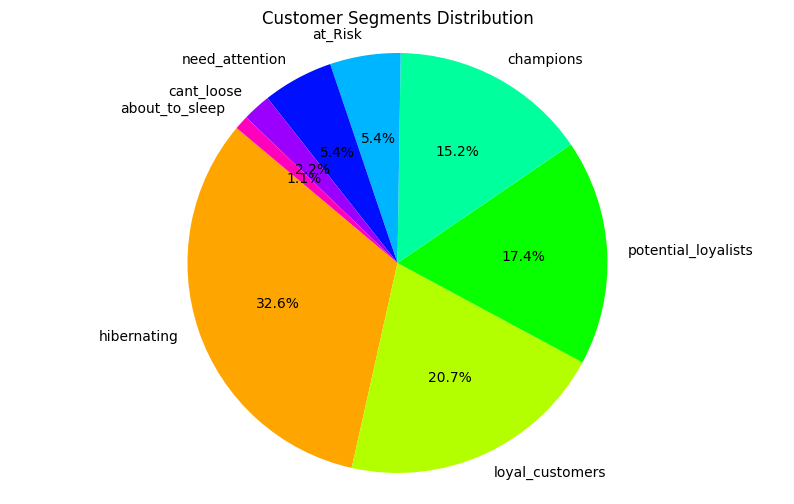

In [648]:
# Pie Chart for Customer Segments
segment_counts = rfm_df['segment'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('hsv', len(segment_counts)))
plt.title('Customer Segments Distribution')
plt.axis('equal')
plt.show()

In [649]:
rfm_df[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(["mean","count", "max"]).round(1)

Recency            Frequency            Monetary        \
                       mean count  max      mean count max      mean count   
segment                                                                      
about_to_sleep        201.0     1  201       3.0     1   3   60243.3     1   
at_Risk               261.2     5  462       3.2     5   4  116238.8     5   
cant_loose            214.0     2  214       4.0     2   4   81084.6     2   
champions              28.1    14   54       6.3    14  26  180127.9    14   
hibernating           324.6    30  515       2.0    30   3   58087.3    30   
loyal_customers       153.9    19  203       3.6    19   5   90552.0    19   
need_attention        195.0     5  202       3.0     5   3   60142.4     5   
potential_loyalists    87.9    16  151       2.9    16   3   71582.1    16   

                               
                          max  
segment                        
about_to_sleep        60243.3  
at_Risk              138798.2  
cant_loose            95223.9  
champions            758195.0  
hibernating           93344.9  
loyal_customers      164575.9  
need_attention        78358.6  
potential_loyalists  115889.9

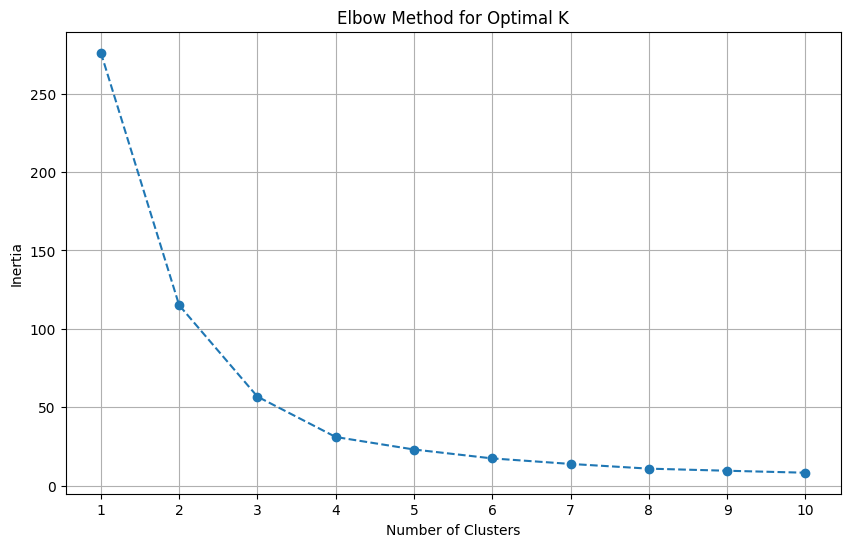

In [650]:
warnings.filterwarnings("ignore")

# Scaling the RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Determining the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


>**Analyze trends over time**

In [651]:
 # Which Year Had The Most Sales?
yearly_sales = data.groupby('year_id')['sales'].sum().reset_index()
yearly_sales.head()

,year_id,sales
0,2003,2898149.94
1,2004,3913700.87
2,2005,1422678.07


Text(0.5, 1.0, 'Sales vs Year')

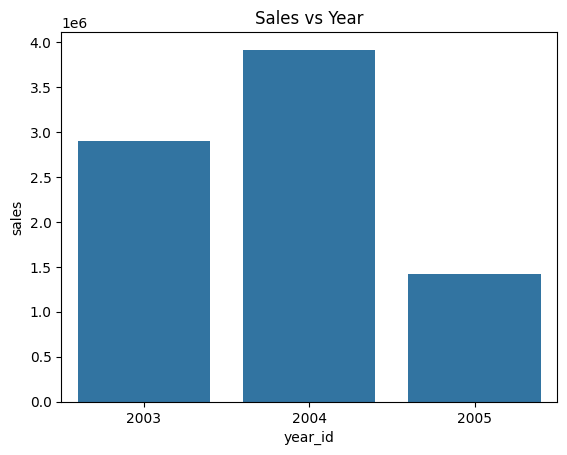

In [652]:
sns.barplot(data=yearly_sales, y='sales', x='year_id')
plt.title('Sales vs Year')

In [653]:
# Which Month Had The Most Sales?
monthly_sales = data.groupby('month_id')['sales'].sum().reset_index()
monthly_sales.head()

,month_id,sales
0,1,659582.29
1,2,668328.15
2,3,626186.73
3,4,516176.55
4,5,744612.91


Text(0.5, 1.0, 'Sales vs Month')

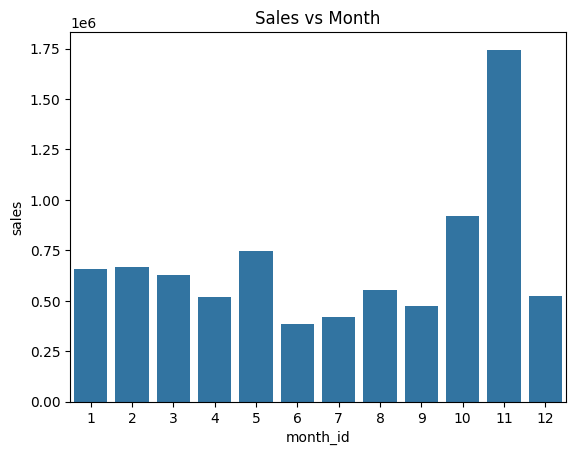

In [654]:
sns.barplot(data=monthly_sales, y='sales', x='month_id')
plt.title('Sales vs Month')

In [655]:
# Which quarter Had The Most Sales?
quarterly_sales = data.groupby('qtr_id')['sales'].sum().reset_index()
quarterly_sales.head()

,qtr_id,sales
0,1,1954097.17
1,2,1645533.05
2,3,1448006.37
3,4,3186892.29


Text(0.5, 1.0, 'Sales vs quarter')

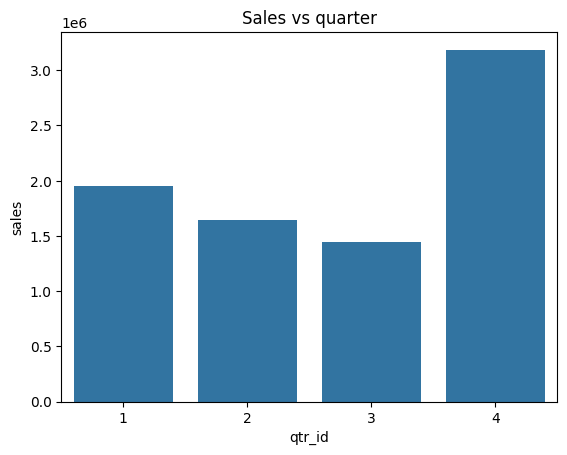

In [656]:
sns.barplot(data=quarterly_sales, y='sales', x='qtr_id')
plt.title('Sales vs quarter')

In [657]:
# Resample data by year
filtered_data = data[data['orderdate'].dt.year.between(2003, 2005)]
yearly_data = filtered_data.resample('Y', on='orderdate').agg({'ordernumber': 'count', 'sales': 'sum'})
yearly_data.rename(columns={'ordernumber': 'order_count'}, inplace=True)

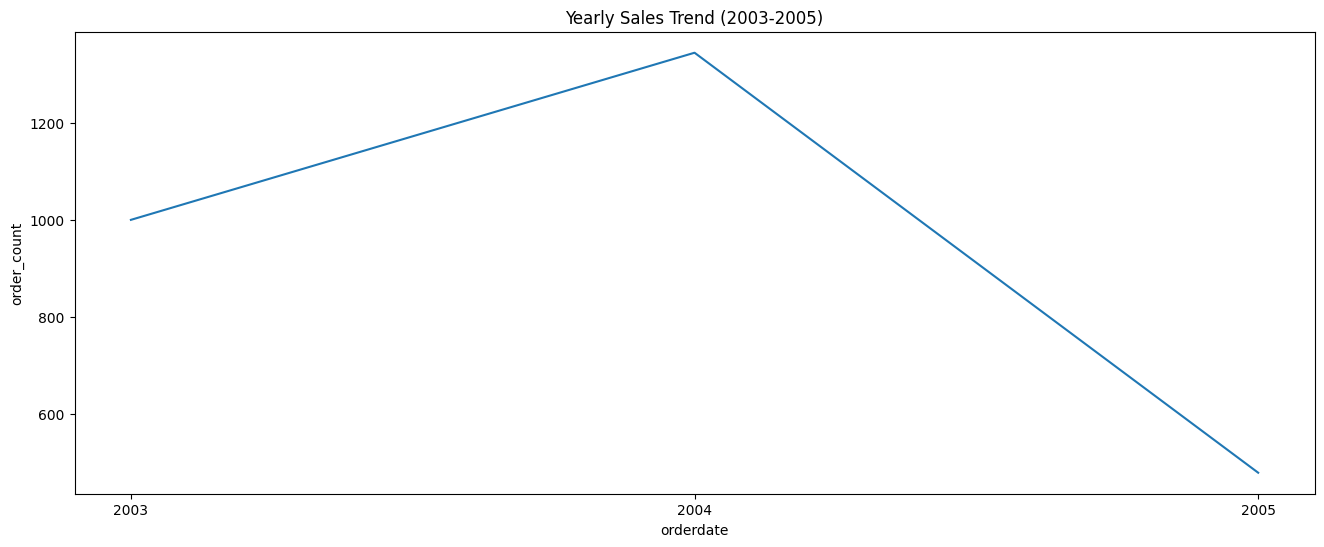

In [658]:
# Plot yearly sales trend
plt.figure(figsize=(16, 6))
sns.lineplot(x=yearly_data.index.strftime('%Y'), y='order_count', data=yearly_data)
plt.title('Yearly Sales Trend (2003-2005)')
plt.show()

In [659]:
# Resample data by quarter
quarterly_data = data.resample('Q', on='orderdate').agg({'ordernumber': 'count', 'sales': 'sum'})
quarterly_data.rename(columns={'ordernumber': 'order_count'}, inplace=True)

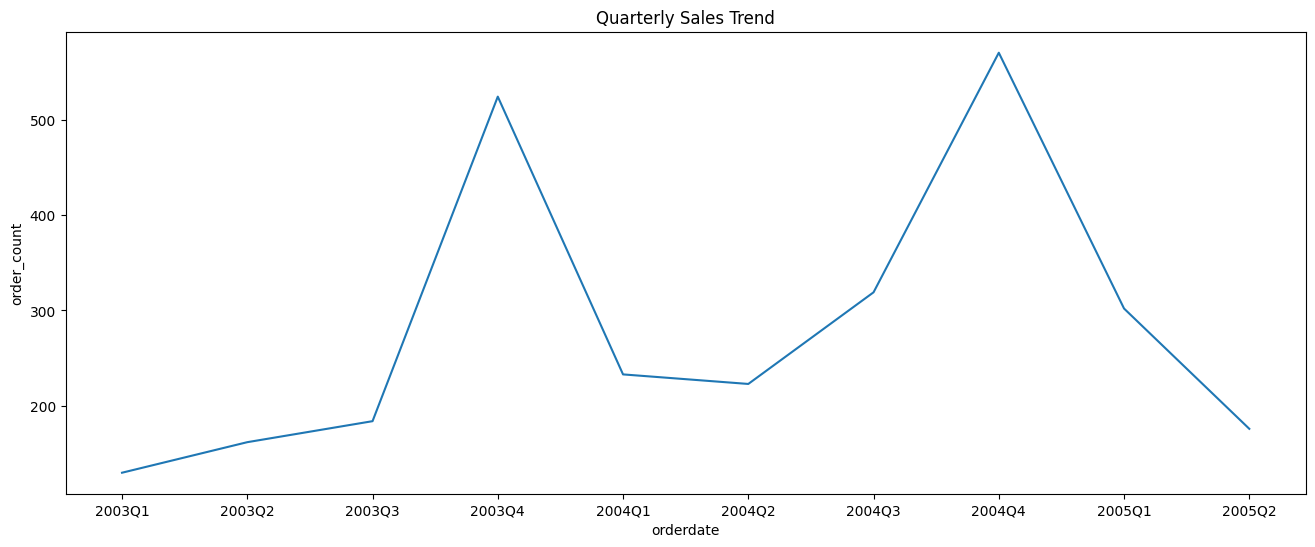

In [660]:
# Plot quarterly sales trend
plt.figure(figsize=(16, 6))
sns.lineplot(x=quarterly_data.index.to_period("Q").astype(str), y='order_count', data=quarterly_data)
plt.title('Quarterly Sales Trend')
plt.show()

In [661]:
# Resample data by month
monthly_data = data.resample('M', on='orderdate').agg({'ordernumber': 'count', 'sales': 'sum'})
monthly_data.rename(columns={'ordernumber': 'order_count'}, inplace=True)

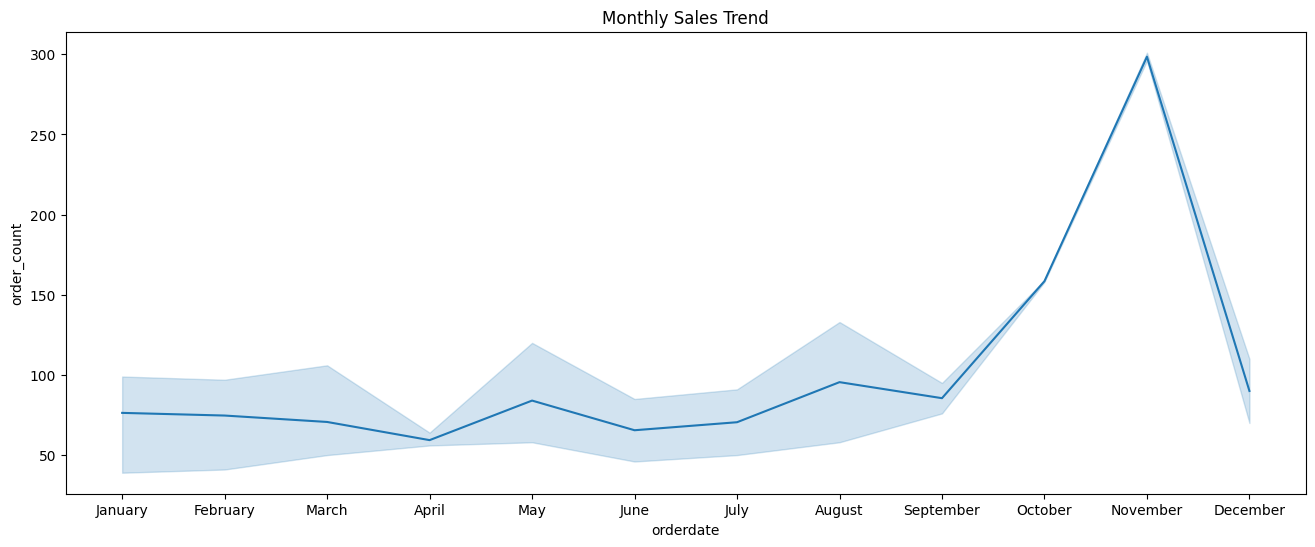

In [662]:
# Plot monthly sales trend
plt.figure(figsize=(16, 6))
sns.lineplot(x=monthly_data.index.month_name(), y='order_count', data=monthly_data)
plt.title('Monthly Sales Trend')
plt.show()

In [663]:
# Save cleaned data into CSV
data.to_csv('cleaned_data.csv', index=False)
print("Data saved to 'cleaned_data.csv'")

Data saved to 'cleaned_data.csv'
